Analyze the HP par space for different solutions

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
HPparspaces = np.zeros((100,40,40))

for i in range(len(HPparspaces)):
    parspace = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/HPparslice.dat'%i)
    parspace = np.swapaxes(parspace,1,0)
    HPparspaces[i] = parspace

In [17]:
LBmin = 0
LBmax = 1
LBstep = .025
par1_res = np.arange(LBmin,LBmax,LBstep)
par2_res = par1_res

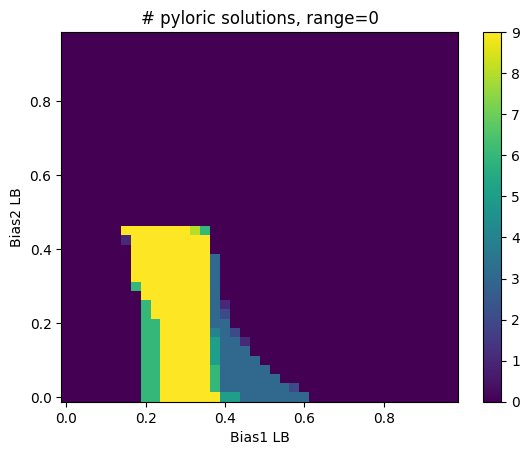

In [18]:
plt.pcolormesh(par1_res,par2_res,HPparspaces[0])
plt.xlabel('Bias1 LB')
plt.ylabel('Bias2 LB')
plt.title('# pyloric solutions, range=0')
plt.colorbar()
plt.show()

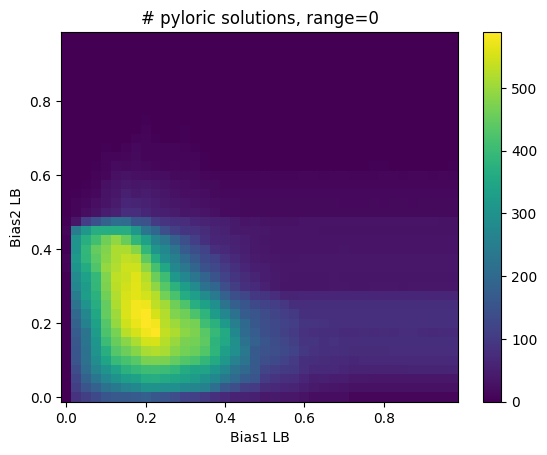

In [20]:
#amalgamate all to see if there are any trends
sumparspace = np.sum(HPparspaces,axis=0)

plt.pcolormesh(par1_res,par2_res,sumparspace)
plt.xlabel('Bias1 LB')
plt.ylabel('Bias2 LB')
plt.title('# pyloric solutions, range=0')
plt.colorbar()
plt.show()

In [40]:
#how well does the best possible 0 range generalist do?
bestgeneralistidx = np.where(sumparspace==np.max(sumparspace))
bestgeneralist = np.array([par1_res[bestgeneralistidx[0][0]],par2_res[bestgeneralistidx[1][0]]])
print(bestgeneralist)
print(sumparspace[bestgeneralistidx])

[0.225 0.2  ]
[589.]


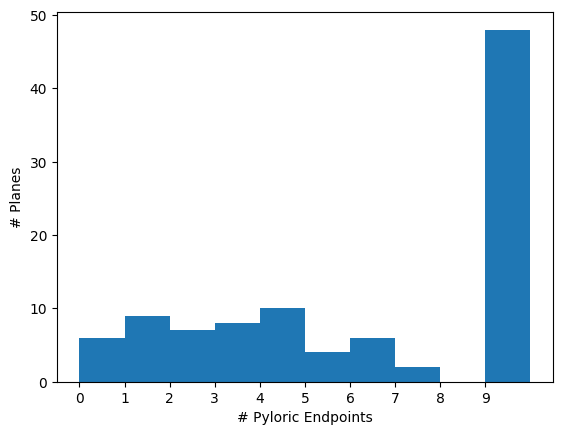

In [53]:
bestgeneralist_perf = np.zeros(100)

for i in range(len(bestgeneralist_perf)):
    bestgeneralist_perf[i] = HPparspaces[i,bestgeneralistidx[0][0],bestgeneralistidx[1][0]]

plt.hist(bestgeneralist_perf,bins = range(11))
plt.xticks(range(10))
plt.ylabel('# Planes')
plt.xlabel('# Pyloric Endpoints')
plt.show()

In [56]:
#how many solutions do not have any fully pyloric end points 

tricksters = []
nontricksters = []

for i in range(len(HPparspaces)):
    if (HPparspaces[i] == 9).any():
        nontricksters.append(i)
    else:
        tricksters.append(i)

print(len(tricksters))

35


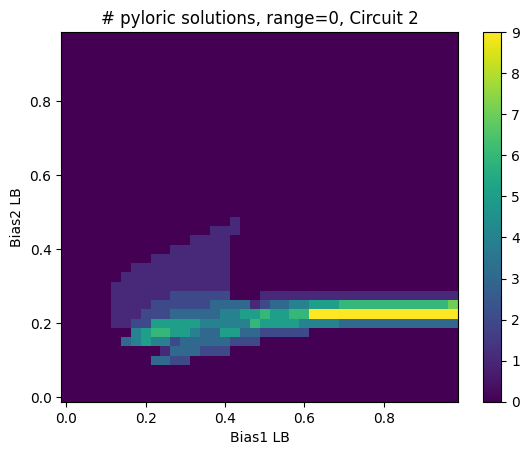

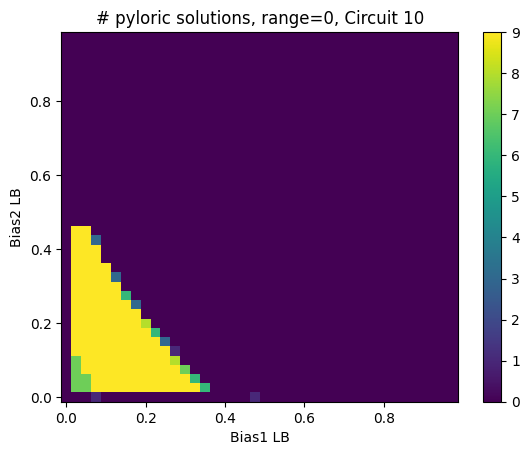

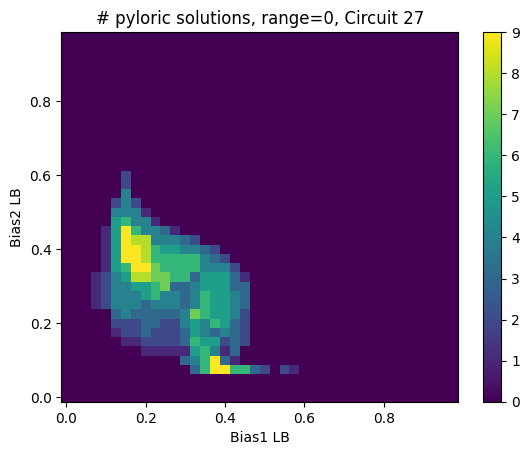

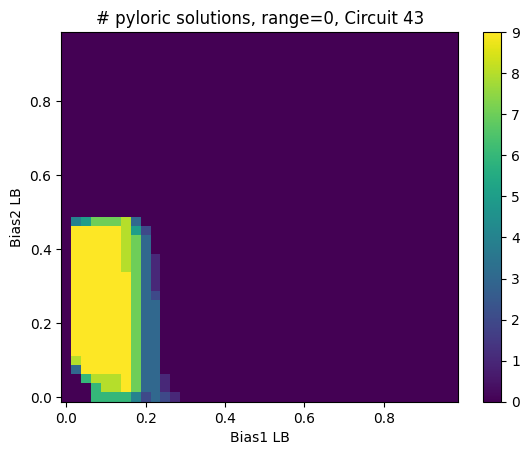

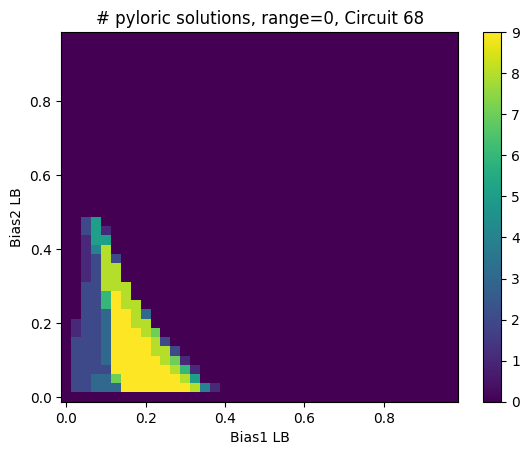

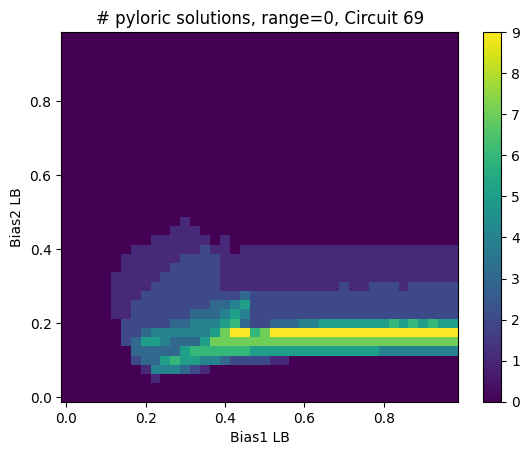

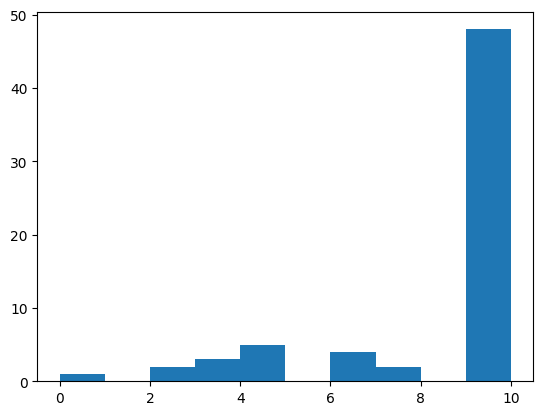

In [63]:
#out of only the solutions for which it is possible to do perfectly, how does the generalist solution do?
bestgeneralist_perf_nontricksters = np.zeros(len(nontricksters))

idx = 0
for i in nontricksters:
    bestgeneralist_perf_nontricksters[idx] = HPparspaces[i,bestgeneralistidx[0][0],bestgeneralistidx[1][0]]
    if bestgeneralist_perf_nontricksters[idx]<4:
        plt.pcolormesh(par1_res,par2_res,HPparspaces[i])
        plt.xlabel('Bias1 LB')
        plt.ylabel('Bias2 LB')
        plt.title('# pyloric solutions, range=0, Circuit %s'%i)
        plt.colorbar()
        plt.show()
    idx += 1

plt.hist(bestgeneralist_perf_nontricksters,bins=range(11))
plt.show()

Repeat the process for .2 range. Hypothesis: more solutions will have baseline good performance, even though some might take a hit for nonspecificity

In [64]:
HPparspacespoint2 = np.zeros((100,40,40))

for i in range(len(HPparspacespoint2)):
    parspace = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/HPparslicerangepoint2.dat'%i)
    parspace = np.swapaxes(parspace,1,0)
    HPparspacespoint2[i] = parspace

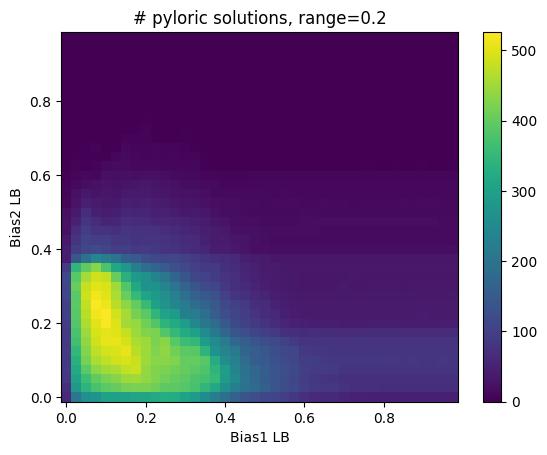

In [66]:
#amalgamate all to see if there are any trends
sumparspacepoint2 = np.sum(HPparspacespoint2,axis=0)

plt.pcolormesh(par1_res,par2_res,sumparspacepoint2)
plt.xlabel('Bias1 LB')
plt.ylabel('Bias2 LB')
plt.title('# pyloric solutions, range=0.2')
plt.colorbar()
plt.show()

In [67]:
#how well does the best possible .2 range generalist do?
bestgeneralistidxpoint2 = np.where(sumparspacepoint2==np.max(sumparspacepoint2))
bestgeneralistpoint2 = np.array([par1_res[bestgeneralistidxpoint2[0][0]],par2_res[bestgeneralistidxpoint2[1][0]]])
print(bestgeneralistpoint2)
print(sumparspacepoint2[bestgeneralistidxpoint2])

[0.225 0.1  ]
[526.]


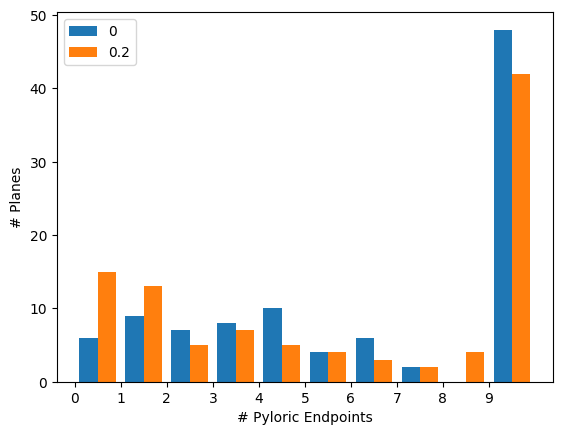

In [73]:
bestgeneralist_perfpoint2 = np.zeros(100)

for i in range(len(bestgeneralist_perfpoint2)):
    bestgeneralist_perfpoint2[i] = HPparspacespoint2[i,bestgeneralistidxpoint2[0][0],bestgeneralistidxpoint2[1][0]]

plt.hist([bestgeneralist_perf,bestgeneralist_perfpoint2],bins = range(11),label = [0,.2])
plt.xticks(range(10))
plt.ylabel('# Planes')
plt.xlabel('# Pyloric Endpoints')
plt.legend()
plt.show()

Hypothesis is not confirmed. There were even more solutions with no or one pyloric endpoint, and only slightly more ones with eight. Will try an a intermediate range (.1)